In [1]:
with open('Korean_movie_reviews_2016.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    texts, labels = zip(*docs)
    # 둘을 분리해서 별도의 list 변수로 저장

In [2]:
words_list = [doc.strip().split() for doc in texts]

In [3]:
total_words = []
for words in words_list:
    total_words.extend(words)

In [4]:
print(len(total_words))
print(len(set(total_words)))

1888659
52011


In [5]:
from collections import Counter
c = Counter(total_words)

In [6]:
max_features = 5000 # 빈도수를 기준으로 상위 5000개의 단어만 사용
common_words = [ word for word, count in c.most_common(max_features)]

In [7]:
len(common_words)

5000

In [8]:
print(common_words)

['영화', '너무', '봤', '좋', '진짜', '정말', '보고', '연기', '평점', '스토리', '배우', '이', '점', '보는', '감동', '했', '시간', '돈', '사람', '그냥', '본', '더', '입니', '였', '것', '이런', '봐', '재미', '하는', '최고', '아니', '내용', '재미없', '왜', '볼', '감독', '생각', '없는', '말', '알', '잘', '노잼', '아깝', '내', '처음', '최악', '할', '기대', '없고', '좀', '나', '좀비', '정도', '꼭', '거', '재밌게', '그', '있는', '알바', '모르', '수', '역시', '같은', '하나', '잼', '때', '보면', '뭐', '느낌', '별로', '완전', '임', '마지막', '재밌었', '장면', '개', '아이', '없다', '한', '들', '없', '분', '안', '와', '중간', '넘', '재밌어', '또', '보세', '끝', '이건', '보다', '다시', '걸', '듯', '보기', '쓰레기', '보지', '액션', '왔', '함', '한번', '같아', '눈물', '연출', '되', '이었', '저', '인생', '개연', '역사', '한국', '수준', '실망', '진심', '억지', '된', '있었', '살', '아닌', '때문', '나왔', '내내', '애', '짱', '우리', '재미있게', '영상', '마블', '작품', '없었', '무슨', '그런', '합', '있', '보러', '움', '마음', '하게', '재밌', '요', '갔', '만든', '난', '솔직히', '캐릭터', '중', '같다', '없어', '이해', '편', '줄', '참', '다른', '전개', '이상', '시리즈', '주고', '눈', '이야기', '현실', '하다', '되는', '연기력', '반전', '재미있었', '강동원', '유치', '대박', '같', '일', '많은', '주인공', '나오는

In [9]:
words_dic ={}  # 각 단어에 index 번호 부여
words_index_dic={} # index 번호가 key가 됨, value는 단어
for index, word in enumerate(common_words):
    words_dic[word]=index
    words_index_dic[index]=word

In [10]:
filtered_indexed_words = [] # index 번호가 부여된 단어들만을 사용해서 각 문서를 표현
for review in words_list:
    indexed_words=[]
    for word in review:
        try:
            indexed_words.append(words_dic[word])
        except: 
            pass
    filtered_indexed_words.append(indexed_words)

In [11]:
filtered_indexed_words[0] # 첫번째 영화 리뷰에 사용된 단어들의 인덱스

[203, 248, 120, 1, 344, 2]

In [12]:
# 어떠한 단어들인지 확인
[words_index_dic[index] for index in filtered_indexed_words[0]]

['부산', '행', '때문', '너무', '기대하고', '봤']

In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(filtered_indexed_words, labels, test_size=0.2)

In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=max_features):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    # len(sequences) => number of documents
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): # sequence => 단어들의 index로 구성되어 있는 리스트
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [15]:
X_train_indexed = vectorize_sequences(X_train)
X_test_indexed = vectorize_sequences(X_test)

In [16]:
X_train_indexed[0]

array([0., 0., 1., ..., 0., 0., 0.])

In [17]:
len(X_train_indexed[0])

5000

In [18]:
X_train_indexed.shape

(132307, 5000)

In [19]:
y_train[0]

0

In [20]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [21]:
y_train_one_hot[0]

array([1., 0.], dtype=float32)

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpoint_filepath = './temp/checkpoint'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [25]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')

In [26]:
X_train_indexed.shape

(132307, 5000)

In [27]:
history = model.fit(X_train_indexed, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
827/827 [==============================] - 4s 4ms/step - loss: 0.3234 - accuracy: 0.8723 - val_loss: 0.2734 - val_accuracy: 0.8894
Epoch 2/20
827/827 [==============================] - 3s 4ms/step - loss: 0.2568 - accuracy: 0.8965 - val_loss: 0.2696 - val_accuracy: 0.8922
Epoch 3/20
827/827 [==============================] - 3s 4ms/step - loss: 0.2474 - accuracy: 0.9004 - val_loss: 0.2702 - val_accuracy: 0.8929
Epoch 4/20
827/827 [==============================] - 3s 4ms/step - loss: 0.2416 - accuracy: 0.9029 - val_loss: 0.2680 - val_accuracy: 0.8931
Epoch 5/20
827/827 [==============================] - 3s 3ms/step - loss: 0.2367 - accuracy: 0.9047 - val_loss: 0.2683 - val_accuracy: 0.8921
Epoch 6/20
827/827 [==============================] - 3s 4ms/step - loss: 0.2323 - accuracy: 0.9073 - val_loss: 0.2661 - val_accuracy: 0.8932
Epoch 7/20
827/827 [==============================] - 3s 4ms/step - loss: 0.2273 - accuracy: 0.9098 - val_loss: 0.2654 - val_accuracy: 0.8938
Epoch 

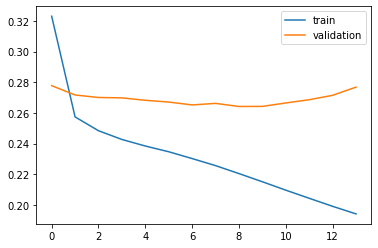

In [44]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [45]:
model.load_weights(checkpoint_filepath)

In [46]:
test_loss, test_acc = model.evaluate(X_test_indexed, y_test_one_hot)
print('test_acc:', test_acc)

1034/1034 [==============================] - 1s 1ms/step - loss: 0.2562 - accuracy: 0.8952
test_acc: 0.8952142000198364


In [28]:
model.predict(X_test_indexed[0:1])

1/1 [==============================] - 0s 73ms/step


array([[0.9960265 , 0.00397344]], dtype=float32)

In [31]:
X_test[0]

[1, 32, 302, 34]

In [33]:
[words_index_dic[index] for index in X_test[0]]

['너무', '재미없', '이제', '볼']